#### 본 매뉴얼에서는 api 호출을 통한 BIDAS 내 데이터 입수 방법에 대해 설명한다. 

- 작성자: 디지털신기술팀 이창훈 과장

In [2]:
# 라이브러리 호출
import bok_da as bd
import pandas as pd

BIDAS에서 제공하는 데이터는 고유의 data id를 갖는다. 다음 코드에서와 같이 입수하고자 하는 data_id의 리스트를 설정하고, `get_bidas_data` 함수에 인자로 입력함으로써 손쉽게 필요한 데이터를 입수할 수 있다. `get_bidas_data` 함수의 인자는 data_id, id(데이터프레임에서 사용할 변수명), start_d(샘플 시작시점), end_d(샘플 마지막시점)으로 구성된다. 원천기관에서 raw 데이터를 불러오고 전처리하는 과정이 복잡해 보일 수 있지만, 한번 해두면 크게 코드를 수정할 필요없이 새로운 데이터에 대해서도 분석 가능한 형태로 전처리 할 수 있기 때문에 효율적이다.

In [3]:
data_id_list = ['NECOS-200U008-Q-10601', 'NECOS-704U001-D-1010301', 'NECOS-901U009-M-0'] # data id list
id_list = ['rgdp', 'cd91', 'cpi'] # 데이터프레임 열이름으로 들어갈 id list

df = bd.get_bidas_data(data_id_list, id_list, start_d='2000-01-01', end_d='2024-05-01').astype(float).resample('Q').mean()

df['rgdp'] = df['rgdp'].pct_change() * 100 # 전월대비 변환
df['cpi'] = df['cpi'].pct_change(4) * 100 # 전년동기대비 변환
df = df[df.index >= '2022-03-31']
df

,rgdp,cd91,cpi
period,,,
2022-03-31,0.660558,1.465254,3.911844
2022-06-30,0.750469,1.796885,5.377679
2022-09-30,0.233727,2.733175,5.840742
2022-12-31,-0.302968,3.910645,5.214290
2023-03-31,0.329875,3.641290,4.599045
2023-06-30,0.608653,3.633115,3.261611
2023-09-30,0.616073,3.735968,3.139371
2023-12-31,0.624853,3.829836,3.416898
2024-03-31,1.279769,3.693770,3.015835


`bok_da` 라이브러리-시각화 패키지(`viz`)에서 시각화 도구 `Plotter`를 불러온다.

In [4]:
from bok_da.viz import Plotter

`Plotter`를 이용해 앞에서 불러온 데이터를 line으로 그린다.

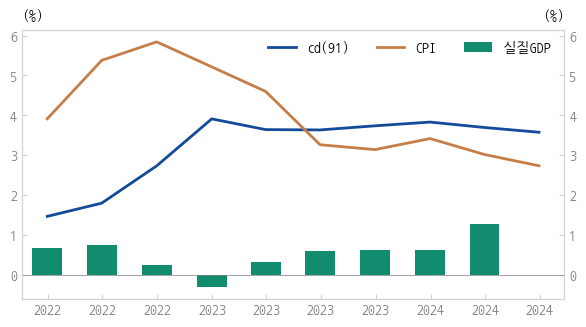

In [6]:
# Plotter
pp = Plotter(xmargin=0.02)
pp.line(df.index, [df.cd91, df.cpi], label=['cd(91)', 'CPI'], linewidth=2)
pp.abline(h=0, linewidth=.5, color='gray')
pp.bar(df.index, [df.rgdp], label=['실질GDP'], width=50)
pp.set_xaxis('year')
pp.annotate('(%)')
pp.to_front(0)
pp.legend()